<a href="https://colab.research.google.com/github/tpadmapriyaGitHub/AgenticAI/blob/Training/Image_Processing_with_Microsoft_Agent_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Understanding with Microsoft Agent Framework (Vision Capabilities)



In this lab, you will learn how to:

- Set up the Microsoft Agent Framework in a Google Colab environment
- Configure an Azure OpenAI Vision-enabled agent
- Send images to an agent using both URL-based and binary (byte) inputs
- Render images locally for verification
- Interpret and validate the agent’s visual understanding output

This lab demonstrates how multimodal AI agents can reason over images in real-world workflows.

## Prerequisites

Before starting this lab, learners should:
- Have basic familiarity with Python
- Understand what Large Language Models (LLMs) and AI agents are
- Have a high-level idea of Azure OpenAI or hosted LLM services

No prior experience with the Agent Framework is required.

## Installing Required Dependencies

This step installs the Agent Framework and its dependencies.
The framework provides abstractions for:
- Agents
- Multimodal messages
- Tooling and orchestration

In [2]:
!pip install agent-framework

## Environment Configuration

This step sets:
- The Azure OpenAI deployment name
- Required imports for Azure agent clients

### Key Concept: Environment Variables
- Environment variables allow you to:
- Avoid hardcoding configuration
- Switch deployments without code changes
- Keep credentials separate from logic

In [3]:
import os
os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"] = "gpt-4.1"
os.environ["AZURE_BASE_URL"] = ""
os.environ["AZURE_OPENAI_API_KEY"] = ""

## Creating a Vision-Enabled Agent

Here, we:

- Initialize an AzureOpenAIChatClient
- Provide the Azure endpoint and API key
- Create a VisionAgent with image analysis instructions

### Key Concept: Agents vs Models
An agent is more than a model:
- It has instructions
- It can handle structured inputs
- It can reason over multiple modalities (text + image)

In this lab, the agent is explicitly instructed to analyze images.

In [4]:
from agent_framework.azure import AzureOpenAIChatClient
# from azure.identity import AzureCliCredential

agent = AzureOpenAIChatClient(
    base_url= os.environ["AZURE_BASE_URL"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
).create_agent(
    name="VisionAgent",
    instructions="You are a helpful agent that can analyze images"
)

## Sending an Image via URL

### What this cell does

This step:
- Creates a ChatMessage

### Includes:
- A text question
- An image reference using a public URL
- Sends both together to the agent

#### Key Concept: Multimodal Messages
A single message can contain:
- Text (TextContent)
- Images (UriContent)
- Audio or binary data

This mirrors how real applications pass context to AI agents.

In [5]:
from agent_framework import ChatMessage, TextContent, UriContent, Role

message1 = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="What do you see in this image?"),
        UriContent(
            uri="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
            media_type="image/jpeg"
        )
    ]
)


## Rendering the Image Locally

### What this cell does

Before trusting the agent’s output, we:
- Download the image manually
- Render it using PIL and matplotlib
- Visually confirm what the agent is seeing

### Why this is important

When working with multimodal AI:
- Always verify the input
- Prevents debugging confusion
- Ensures the model and human share the same context

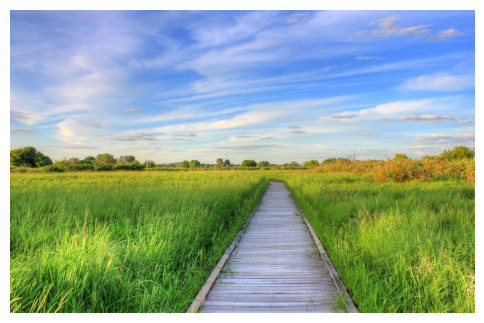

In [6]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
response.raise_for_status()  # fail fast if request is bad

img = Image.open(BytesIO(response.content))

plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis("off")
plt.show()


## Running the Agnet

Here we:
- Run the agent asynchronously
- Print the agent’s textual understanding of the image

Notice how the agent:
- Identifies scenery elements
- Describes composition and mood
- Provides a natural language explanation

This confirms successful vision + language reasoning.

In [7]:
result = await agent.run(message1)
print(result.text)

This image shows a beautiful outdoor landscape. There is a wooden boardwalk or path running through a lush, green grassy area, likely a meadow or wetland. The sky above is bright blue with scattered, wispy clouds. In the background, there are bushes and trees lining the horizon. The scene evokes a sense of peace and tranquility, and looks like a place ideal for walking or enjoying nature.


### Utility Function for Image Rendering

- Load an image from disk
- Extract its dimensions
- Display it cleanly in the notebook

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

def render_image(path):
  img = Image.open(path)
  width, height = img.size
  plt.imshow(img)
  plt.axis("off")
  plt.show()

## Running the Agent on Local Images Data


Here the agent:
- Receives raw image bytes
- Analyzes the visual content
- Returns a detailed description

#### Processing Image 1

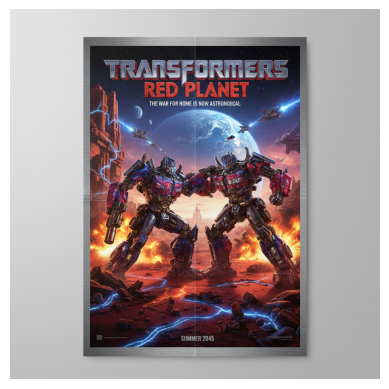

This image is a movie poster for a film titled **"Transformers: Red Planet."** The tagline on the poster reads: "THE WAR FOR HOME IS NOW ASTRONOMICAL." The visual features two large robot characters, likely Autobots, seemingly engaged in a dynamic stance on a rocky alien landscape with explosions and energy lines. In the background, there's a blue planet (possibly Earth or Mars) with flying spacecrafts overhead, adding to the sci-fi and action motifs. The release date indicated at the bottom is "SUMMER 2045." The overall theme suggests an epic Transformers battle on another planet.


In [9]:
from agent_framework import ChatMessage, TextContent, DataContent, Role

# Load image from local file
with open("/content/image1.png", "rb") as f:
    image_bytes = f.read()

message2 = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="What do you see in this image?"),
        DataContent(
            data=image_bytes,
            media_type="image/jpeg"
        )
    ]
)
render_image("/content/image1.png")
result = await agent.run(message2)
print(result.text)

#### Processing Image 2

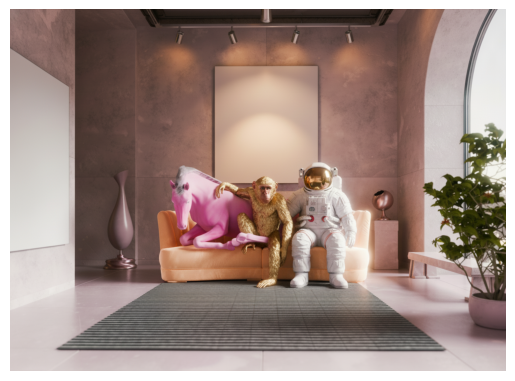

The image depicts a whimsical, surreal scene set in a modern and aesthetically pleasing room. Three figures are sitting together on a couch:

1. On the left, there is a pink horse, with its head lowered.
2. In the center, there is a golden monkey whose face is blurred. The monkey has its arm around the pink horse.
3. On the right, there is a person or figure dressed in a classic white astronaut suit with a reflective gold visor.

The background features stylish decor, including a vase, a piece of abstract wall art, and a plant. The lighting is soft and creates a cozy yet playful atmosphere. The combination of the pink horse, golden monkey, and astronaut makes the scene imaginative and surreal.


In [10]:
from agent_framework import ChatMessage, TextContent, DataContent, Role

# Load image from local file
with open("/content/image2.png", "rb") as f:
    image_bytes = f.read()

message2 = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="What do you see in this image?"),
        DataContent(
            data=image_bytes,
            media_type="image/jpeg"
        )
    ]
)
render_image("/content/image2.png")
result = await agent.run(message2)
print(result.text)

### Processing Image 3

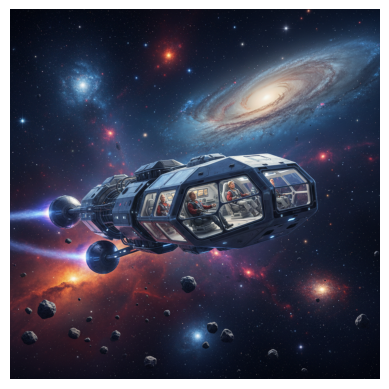

This image depicts a futuristic spaceship traveling through outer space. The spacecraft has a large, glass-fronted cockpit area where several crew members in space suits can be seen operating controls and monitoring screens. The ship is flying amidst a field of asteroids or small rocky objects, with vibrant stars, glowing nebulae, and a spiral galaxy visible in the background, creating a dramatic and visually stunning cosmic scene. The overall style and details suggest a science fiction theme.


In [11]:
from agent_framework import ChatMessage, TextContent, DataContent, Role

# Load image from local file
with open("/content/image3.png", "rb") as f:
    image_bytes = f.read()

message2 = ChatMessage(
    role=Role.USER,
    contents=[
        TextContent(text="What do you see in this image?"),
        DataContent(
            data=image_bytes,
            media_type="image/jpeg"
        )
    ]
)
render_image("/content/image3.png")
result = await agent.run(message2)
print(result.text)

## Common Pitfalls & Notes

- Always verify image inputs before sending to the agent
- URL-based images may fail due to:
  - Redirects
  - Missing headers
- Binary image input is more reliable for production systems

## Learning Outcomes

By completing this lab, we can now:
- Set up and use Microsoft Agent Framework in Colab
- Create a vision-capable Azure OpenAI agent
- Send images via URL and binary formats
- Validate multimodal inputs visually
- Interpret AI-generated image understanding outputs

## Next Steps

- Add multiple images in a single prompt
- Combine image + document analysis
- Chain vision output into downstream agents
- Add safety or moderation layers